In [51]:
import os
print(os.getcwd())

c:\Users\Ahmed\Desktop\AdvSecLab\advseceng25-sca-framework-main\src\py


In [52]:
import numpy as np
import matplotlib.pyplot as plt

In [53]:
data = np.load(r"C:\Users\Ahmed\Desktop\AdvSecLab\traces\traces_0.npz")
print(data.files)
print(data['wave'].shape)
num_traces = data['wave'].shape[0]
trace_length = data['wave'].shape[1]

print(f"Number of traces: {num_traces}")
print(f"Trace length: {trace_length} samples")

['wave', 'dut_io_data', 'dut_io_computed_data']
(5000, 150)
Number of traces: 5000
Trace length: 150 samples


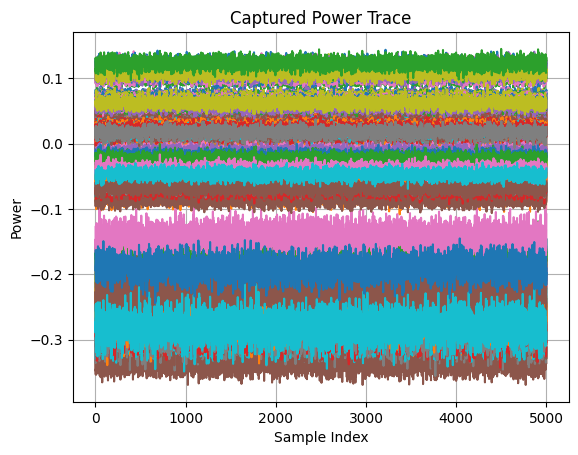

In [46]:
# Example: plot the waveform
waveform = data['wave']
plt.plot(waveform)
plt.title("Captured Power Trace")
plt.xlabel("Sample Index")
plt.ylabel("Power")
plt.grid(True)
plt.show()

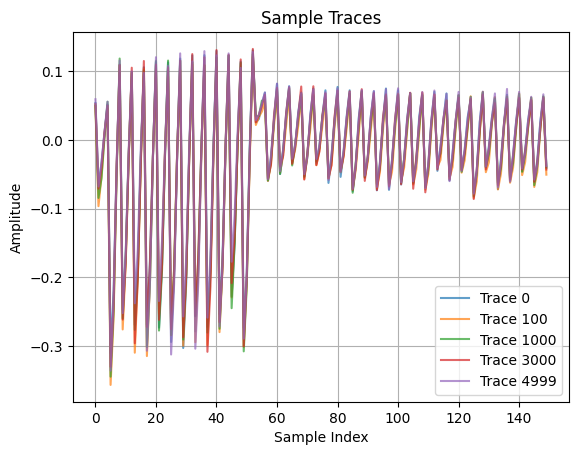

In [55]:
# multiple traces

for i in [0, 100, 1000, 3000, 4999]:  # Adjust if fewer traces
    plt.plot(data['wave'][i], alpha=0.7, label=f"Trace {i}")
plt.title("Sample Traces")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

In [57]:
data = np.load(r"C:\Users\Ahmed\Desktop\AdvSecLab\traces\traces_0.npz", allow_pickle=True)
print("Keys in .npz:", list(data.keys()))


Keys in .npz: ['wave', 'dut_io_data', 'dut_io_computed_data']


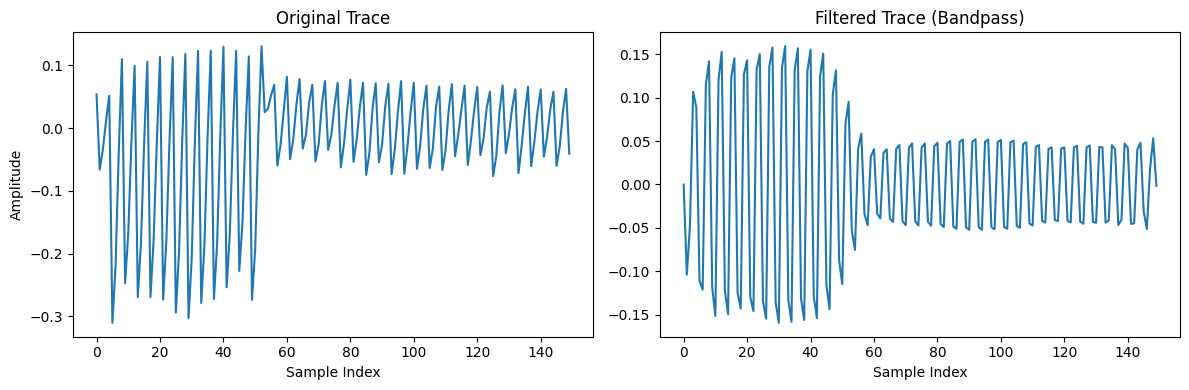

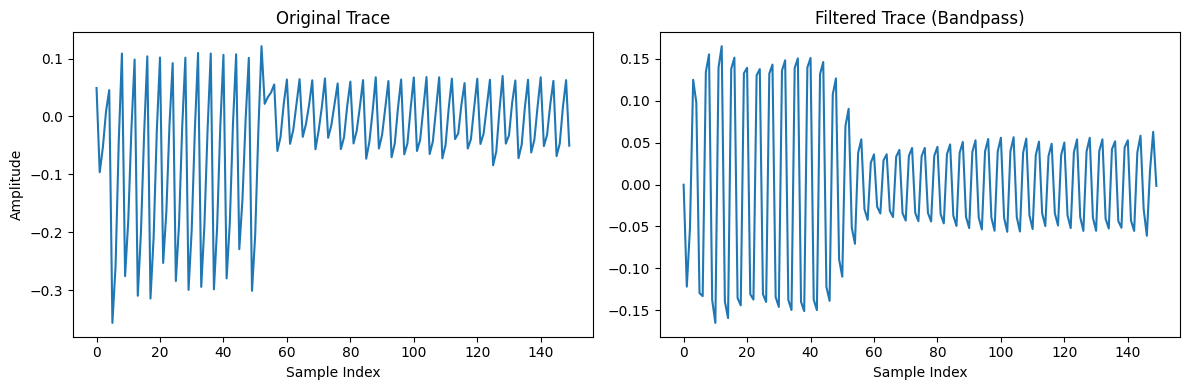

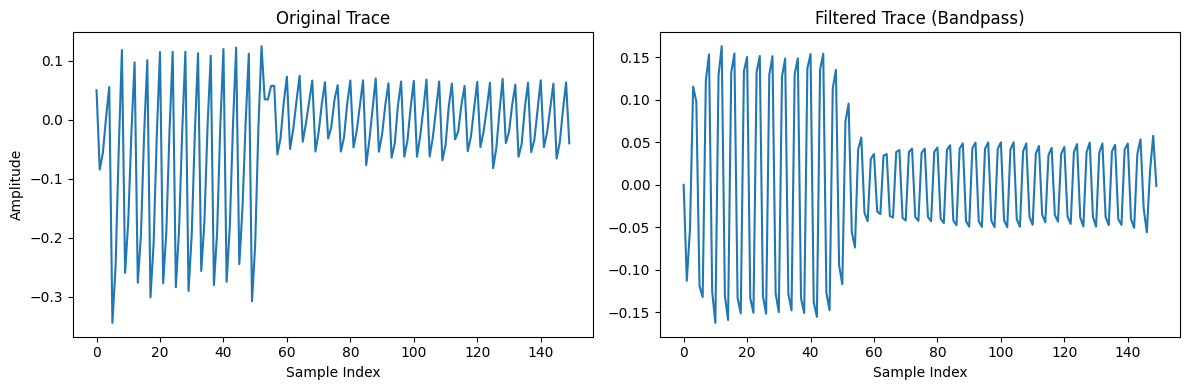

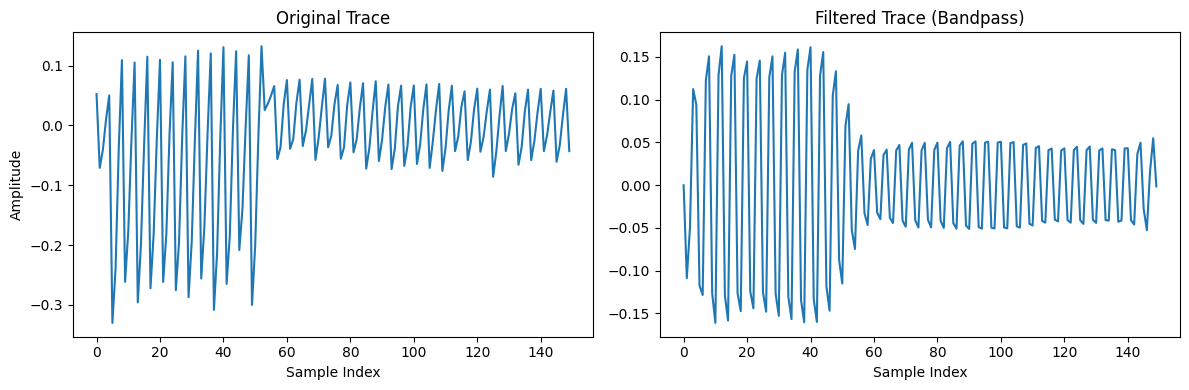

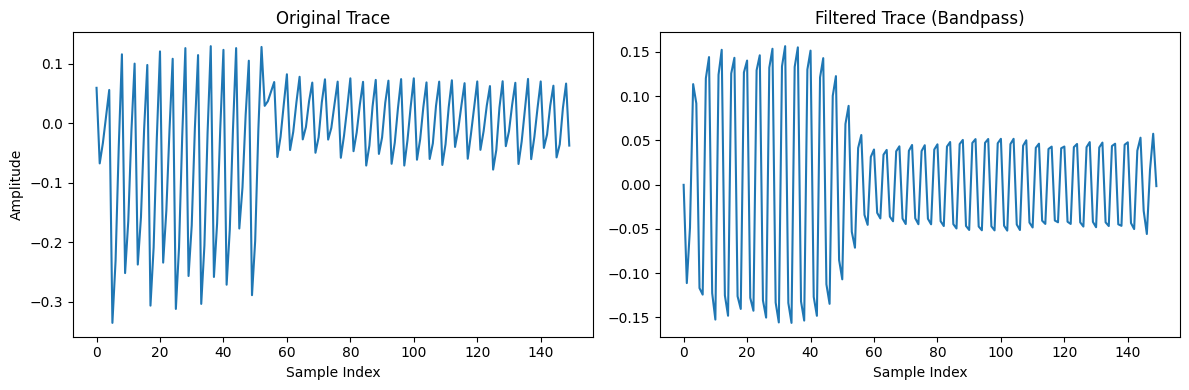

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Define the bandpass filter
def bandpass_filter(trace, lowcut=20e6, highcut=30e6, fs=100e6, order=4):
    nyq = 0.5 * fs
    b, a = butter(order, [lowcut/nyq, highcut/nyq], btype='band')
    return filtfilt(b, a, trace)

# Load the .npz file
traces = data['wave']
dut_io_data = data['dut_io_data']
dut_io_computed_data = data['dut_io_computed_data']

# Apply the filter to all traces
filtered_traces = np.array([bandpass_filter(trace) for trace in traces])

# Plot one example trace (before and after filtering)

example_index = 0
for example_index in [0, 100, 1000, 3000, 4999]:
    original = traces[example_index]
    filtered = filtered_traces[example_index]

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(original)
    plt.title("Original Trace")
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")

    plt.subplot(1, 2, 2)
    plt.plot(filtered)
    plt.title("Filtered Trace (Bandpass)")
    plt.xlabel("Sample Index")
    plt.tight_layout()
    plt.show()

# Save filtered traces to a new file
np.savez_compressed(
    'data/traces_1_filtered.npz',
    wave=filtered_traces,
    dut_io_data=dut_io_data,
    dut_io_computed_data=dut_io_computed_data
)


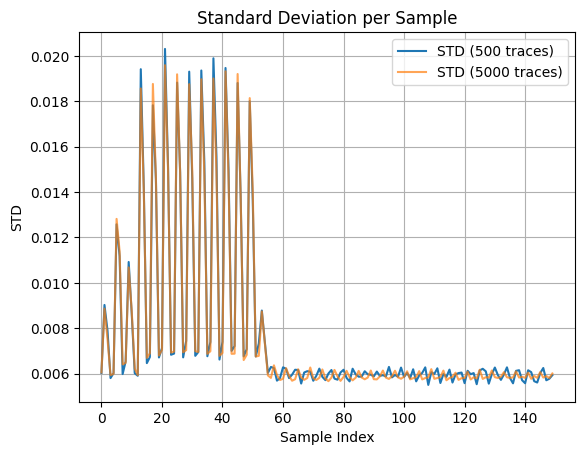

In [60]:
waves_500 = np.array([trace for trace in traces[:500]])
waves_5000 = np.array([trace for trace in traces[:5000]])

std_500 = np.std(waves_500, axis=0)
std_5000 = np.std(waves_5000, axis=0)

plt.plot(std_500, label='STD (500 traces)')
plt.plot(std_5000, label='STD (5000 traces)', alpha=0.7)
plt.title("Standard Deviation per Sample")
plt.xlabel("Sample Index")
plt.ylabel("STD")
plt.legend()
plt.grid(True)
plt.show()



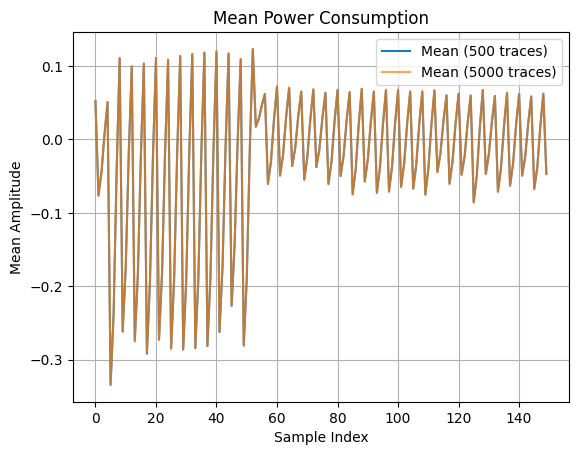

In [61]:
mean_500 = np.mean(waves_500, axis=0)
mean_5000 = np.mean(waves_5000, axis=0)

plt.plot(mean_500, label="Mean (500 traces)")
plt.plot(mean_5000, label="Mean (5000 traces)", alpha=0.7)
plt.title("Mean Power Consumption")
plt.xlabel("Sample Index")
plt.ylabel("Mean Amplitude")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(__file__), '..')))

from sca_framework.snr_analysis import SNRAnalyzer

for size in batch_sizes:
    snr = snr_analyzer.calculate_snr_empirical(traces[:size], correct_key, 0)
    print(f"{size} traces → Max SNR: {np.max(snr):.4f}")
